In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.titlesize'] = 18

# Trinity explosion

Data from [G.I. Taylor *The formation of a blast wave by a very intense explosion: II. The atomic explosion of 1945.* Proc. R. Soc. Lond. **A201** 175–186](https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1950.0050#page=2)

In [2]:
df = pd.read_csv('data/GITaylor_Trinity_data.csv')

In [23]:
df['t_sec'] = df['t_msec'] * 1e-3  # convert msec to sec

df['log10_t'] = df['t_sec'].apply(lambda x: np.log10(x))
df['5/2*log10_R'] = df['R_m'].apply(lambda x: 5/2*np.log10(x))
df.head()

,t_msec,R_m,t_sec,log10_t,log10_R,5/2*log10_R
0,0.10,11.1,0.00010,-4.000000,2.613307,2.613307
1,0.24,19.9,0.00024,-3.619789,3.247133,3.247133
2,0.38,25.4,0.00038,-3.420216,3.512084,3.512084
3,0.52,28.8,0.00052,-3.283997,3.648481,3.648481
4,0.66,31.9,0.00066,-3.180456,3.759477,3.759477


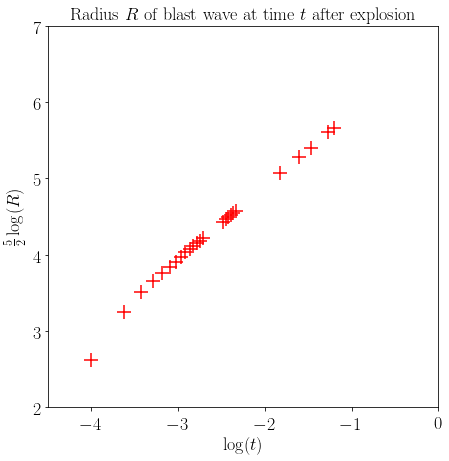

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r')
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion');

Let us fit a straight line to this data using a simple linear regression

In [15]:
# set up data
X = df['log10_t'].values.reshape(1, -1).T
y = df['5/2*log10_R'].values
y.shape, X.shape

((25,), (25, 1))

In [17]:
# fit Linear Regression: y = mx+n
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f'slope    : m = {model.coef_[0]:.2f}')
print(f'intercept: n = {model.intercept_:.2f}')

slope    : m = 1.01
intercept: n = 6.94


c:\users\jsdiaz\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


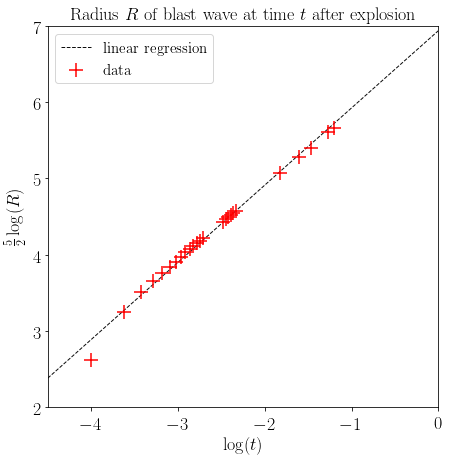

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7

ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)
# plot linear fit
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, model.intercept_ + model.coef_[0] * logt, 'k--', linewidth=1, 
        label=f'linear regression', zorder=0, alpha=0.95)

ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion');
ax.legend(fontsize=15);
# fig.savefig('plots/TrinityBlastWave-Taylor.pdf', bbox_inches='tight')

The energy is given in terms of the intercept $n$ as

$$ E_0 = \frac{10^{2n}\rho_0}{S(\gamma)^5} $$

where $\rho_0$=1.23 kg/m$^3$ in the density of the undisturbed air and the constant for air ($\gamma=1.4$) is $S(1.4)^{-5}$ = 0.856.

In [22]:
# explosion yield in kt TNT
# 1 TJ = 4.25 kt TNT
E0 = 10**(2*model.intercept_) * 0.856 * 1.23
print(f'E = {E0 / ( 4.25e12):.1f} kt TNT  ({E0:.2E} J)')

E = 19.0 kt TNT  (8.05E+13 J)
